# Batch Gradient Descent with Custom Data

In [281]:
import numpy as np
import random, copy, math
import matplotlib.pyplot as plt

# Generate training data

In [259]:
# tmp = np.arange(0,100)
# tmp = tmp.reshape(-1, 1)
# X_train = np.hstack([tmp, tmp**2])
# y_train = (-100*tmp**4 + tmp**5 + random.randint(-10, 10))
# m, n = X_train.shape

# y_train = y_train.reshape(-1)


In [317]:
tmp = np.arange(0,100)
tmp = tmp.reshape(-1, 1)
tmp = np.hstack([tmp, random.uniform(0.9, 1.1) * tmp**2, random.uniform(0.9, 1.1) * -100*tmp**4 + random.uniform(0.9, 1.1) * tmp**5])
o = copy.deepcopy(tmp)
original = np.array_split(o, [60, 80])

random.shuffle(tmp)
shuffled = np.array_split(tmp, [60, 80])

train = shuffled[0]
cv = shuffled[1]
test = shuffled[2]

X_train = train[0:,:-1]
y_train = train[:,-1]

train_og = original[0]
cv_og = original[1]
test_og = original[2]

X_train_og = train_og[0:,:-1]
y_train_og = train_og[:,-1]

# Analyze data

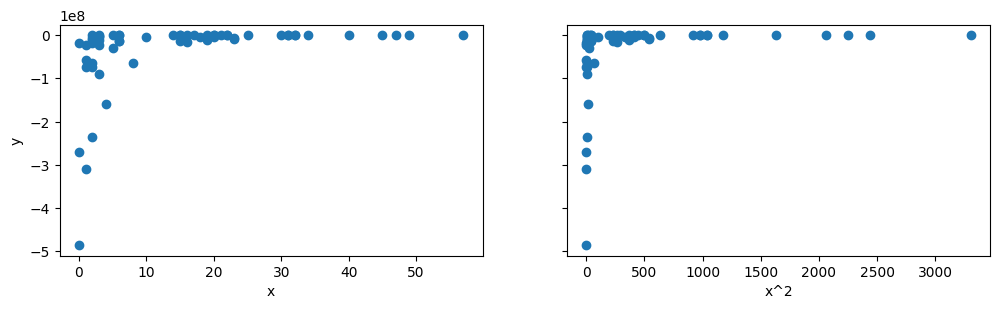

In [328]:
X_features = ['x', 'x^2']
fig, ax = plt.subplots(1, 2, figsize=(12, 3), sharey=True)
for i in range(len(ax)):
    ax[i].scatter(X_train[:,i], y_train)
    ax[i].set_xlabel(X_features[i])
ax[0].set_ylabel("y")
plt.show()

(60,)
[-4.85661097e+08 -3.08810879e+08 -2.70619415e+08 -2.35164679e+08
 -1.58908620e+08 -9.05286119e+07 -7.30165128e+07 -7.30165128e+07
 -6.51811975e+07 -6.51811975e+07 -5.79344774e+07 -2.97848552e+07
 -2.18665806e+07 -2.18665806e+07 -1.85259810e+07 -1.85259810e+07
 -1.55641930e+07 -1.29559060e+07 -1.29559060e+07 -1.29559060e+07
 -1.06758245e+07 -1.06758245e+07 -1.06758245e+07 -8.69878226e+06
 -6.99985512e+06 -5.55447478e+06 -5.55447478e+06 -4.33854203e+06
 -4.33854203e+06 -4.33854203e+06 -3.32854019e+06 -9.04247788e+05
 -3.78121634e+05 -1.22089583e+05 -1.22089583e+05 -1.22089583e+05
 -1.22089583e+05 -5.94687262e+04 -5.94687262e+04 -2.46003196e+04
 -7.86024286e+03 -7.86024286e+03 -7.86024286e+03 -7.86024286e+03
 -7.86024286e+03 -7.86024286e+03 -1.56776115e+03 -1.56776115e+03
 -1.56776115e+03 -1.56776115e+03 -1.56776115e+03 -1.56776115e+03
 -1.56776115e+03 -9.89301085e+01 -9.89301085e+01 -9.89301085e+01
 -9.89301085e+01  0.00000000e+00  0.00000000e+00  0.00000000e+00]


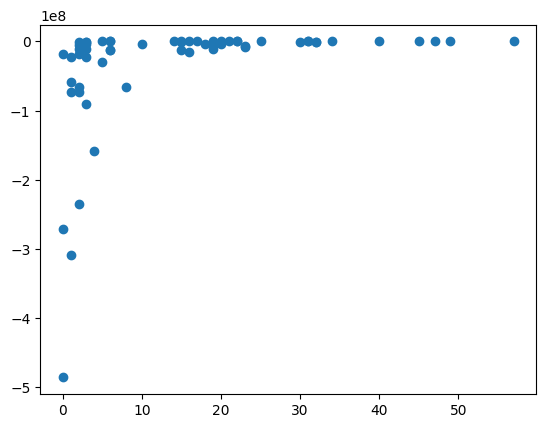

In [325]:
print(y_train.shape)
print(y_train)
# plt.plot(o[:,-1])
plt.scatter(X_train[:,0], y_train)
plt.show()

# Feature engineering

In [329]:
X_train = np.c_[
    X_train,
    (X_train[:,0] ** 3),
    (X_train[:,0] ** 4), 
    (X_train[:,0] ** 5),
    (X_train[:,0] ** 6),
    (X_train[:,0] ** 7),
    (X_train[:,0] ** 8),
    (X_train[:,0] ** 9),
    (X_train[:,1] ** 3),
    (X_train[:,1] ** 4), 
    (X_train[:,1] ** 5), 
    (X_train[:,1] ** 6), 
    (X_train[:,1] ** 7), 
    (X_train[:,1] ** 8), 
    (X_train[:,1] ** 9),
]

# Perform feature scaling

In [330]:
mu = np.mean(X_train, axis=0)
sigma = np.std(X_train, axis=0)
X_norm = (X_train - mu) / sigma

y_mu = np.mean(y_train, axis=0)
y_sigma = np.std(y_train, axis=0)
y_norm = (y_train - y_mu) / y_sigma

In [238]:
def model(w, x, b):
    return np.dot(w, x) + b

_,n = X_norm.shape
model(np.ones(n,), X_norm[0], 0)

-5.508667121037215

In [239]:
def cost(w, X, b, y):
    m, _ = X.shape
    sum = 0

    for i in range(m):
        x = X[i]
        sum += ((model(w, x, b) - y[i]) ** 2) / (2 * m)
    return sum 

_,n = X_norm.shape
cost(np.ones(n,), X_norm, 0, y_norm)

93.74536558226895

In [240]:
def gradient(w, X, b, y):
    m, n = X.shape

    dj_dw = np.zeros(n,)
    dj_db = 0

    for i in range(m):
        x = X[i]
        err = model(w, x, b) - y[i]
        for j in range(n):
            dj_dw += err * x[j]
        dj_db += err

    dj_dw /= m
    dj_db /= m
    
    return dj_dw, dj_db

_,n = X_norm.shape
gradient(np.ones(n,), X_norm, 0, y_norm)

(array([174.22083211, 174.22083211, 174.22083211, 174.22083211,
        174.22083211, 174.22083211, 174.22083211, 174.22083211,
        174.22083211, 174.22083211, 174.22083211, 174.22083211,
        174.22083211, 174.22083211, 174.22083211, 174.22083211]),
 3.552713678800501e-16)

In [243]:
def gradient_descent(w, X, b, y, alpha, iterations):

    w = copy.deepcopy(w)
    b = copy.copy(b)
    J_history = []

    for i in range(iterations):
        dj_dw, dj_db = gradient(w, X, b, y)
        w = w - alpha * dj_dw
        b = b - alpha * dj_db

        if i < 100000:      # prevent resource exhaustion
            J_history.append(cost(w, X, b, y)) # Print cost every at intervals 10 times or as many iterations if < 10

        if i % math.ceil(iterations / 10) == 0:
            print(f"Iteration {i:4d}: Cost {J_history[-1]:8.2f}")

    return w, b, J_history

_,n = X_norm.shape
w_calc, b_calc, j_hist = gradient_descent(np.ones(n,), X_norm, 0, y_norm, 0.003, 1000)

print(w_calc, b_calc)

Iteration    0: Cost    24.81
Iteration  100: Cost     0.04
Iteration  200: Cost     0.04
Iteration  300: Cost     0.04
Iteration  400: Cost     0.04
Iteration  500: Cost     0.04
Iteration  600: Cost     0.04
Iteration  700: Cost     0.04
Iteration  800: Cost     0.04
Iteration  900: Cost     0.04
[-0.07576306 -0.07576306 -0.07576306 -0.07576306 -0.07576306 -0.07576306
 -0.07576306 -0.07576306 -0.07576306 -0.07576306 -0.07576306 -0.07576306
 -0.07576306 -0.07576306 -0.07576306 -0.07576306] 2.781663788198413e-17


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


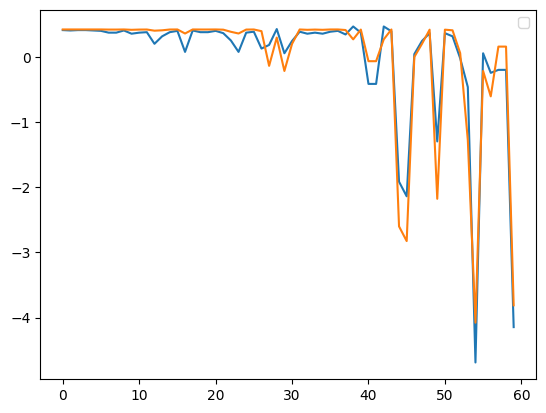

In [244]:
y_calc = np.dot(X_norm, w_calc) + b_calc
plt.plot(y_calc)
plt.plot(y_norm)
plt.legend()
plt.show()

# With Regularization

In [245]:
def compute_gradient_regularization(w, X, b, y, lmbda):
    m,n = X.shape
    dj_dw = np.zeros(n, )
    dj_db = 0.

    for i in range(m):
        x = X[i]
        err = model(w, x, b) - y[i]
        for j in range(n):
            dj_dw[j] += err * x[j]
        dj_db += err
    dj_dw = dj_dw / m + (lmbda / m) * w[j]
    dj_db /= m
    return dj_dw, dj_db

def gradient_descent_regularization(w, X, b, y, alpha, lmbda, num_iter):
    w = copy.deepcopy(w)
    b = 0
    J_history = []
    for iter in range(num_iter):
        dj_dw, dj_db = compute_gradient_regularization(w, X, b, y, lmbda)
        w = w - alpha * dj_dw
        b = b - alpha * dj_db   
        
        if iter < 100000:      # prevent resource exhaustion 
            J_history.append(cost(w, X, b, y)) # Print cost every at intervals 10 times or as many iterations if < 10
                
        if iter % math.ceil(num_iter / 10) == 0:
            print(f"Iteration {iter:4d}: Cost {J_history[-1]:8.2f}")

    return w, b, J_history

w_reg, b_reg, J_hist = gradient_descent_regularization(np.ones(n,), X_norm, 0, y_train, 0.001, 0.0001, 10000)

print(w_reg, b_reg)

Iteration    0: Cost 2790283822498826.50
Iteration 1000: Cost 94259781418865.33
Iteration 2000: Cost 28257571860539.73
Iteration 3000: Cost 16410004255548.81
Iteration 4000: Cost 13309419622797.75
Iteration 5000: Cost 11929138679117.78
Iteration 6000: Cost 10998580058686.11
Iteration 7000: Cost 10232134090882.60
Iteration 8000: Cost 9549493700383.84
Iteration 9000: Cost 8923370399583.98
[ -7078541.46846985 -12972762.68224793 -13030698.02057662
 -11061377.29082206  -8613635.13753004  -6211551.3802588
  -4015069.84513558  -2059892.58308953   -338969.94484333
  -6211551.3802588   -2059892.58308953   1168855.3471706
   3947063.16454211   3401604.128328     -685827.58005476
    -19561.84269935] -29627020.954538263


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


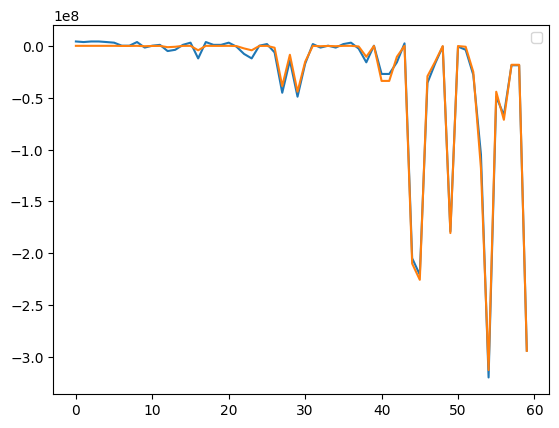

In [246]:
y_calc = np.dot(X_norm, w_reg) + b_reg
plt.plot(y_calc)
plt.plot(y_train)
plt.legend()
plt.show()